In [ ]:
import numpy as np
import sklearn
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import  metrics

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import History
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import History
from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
import os

print(tf.__version__)

print(keras.__version__)

DataImport

In [52]:

PATH = os.path.join("data", "bank-additional", "bank-additional")

In [53]:



def load_data(filename, path=PATH):
    csv_path = os.path.join(path, filename)
    return pd.read_csv(csv_path,sep=';')

In [54]:
full_data = load_data("bank-additional-full.csv")

In [55]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [56]:
full_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [57]:
full_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [58]:
full_data[full_data.duplicated()].shape

(12, 21)

In [59]:
print(full_data.shape)
full_data.drop_duplicates(inplace=True)
print(full_data.shape)

(41188, 21)
(41176, 21)


In [67]:
full_data.at[2,'job'] = None
full_data.at[3,'job'] = None
full_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,dupa
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,NaN,None,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2
3,40.0,None,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0


In [66]:
def mostly_unknown(row):
    bbb=0
    # print(row)
    for sa in row:
        if sa == 'unknown':
            bbb=bbb+1
    return bbb
def nullNumber(row):
    bbb=0
    # print(row)
    for sa in row:
        if pd.isnull(sa):
            bbb=bbb+1
    return bbb
full_data['dupa']=full_data.apply(lambda x:nullNumber(x), axis=1)
print(full_data['dupa'].value_counts())

0    41174
2        1
1        1
Name: dupa, dtype: int64


In [32]:
print(full_data.shape)
full_data.drop(full_data[full_data.apply(lambda x:mostly_unknown(x), axis=1)>=3].index, inplace=True)
print(full_data.shape)

(41176, 22)
(40848, 22)


In [12]:
full_data['y'].value_counts()

no     36232
yes     4616
Name: y, dtype: int64

ładne obrazki data-----

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

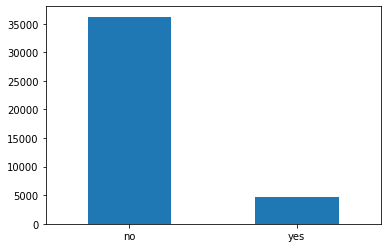

In [13]:
ax=full_data['y'].value_counts().plot.bar()
plt.xticks(rotation = 0)


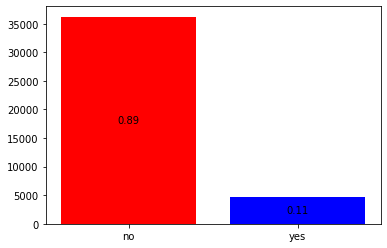

In [14]:
import numpy as np
import matplotlib.pyplot as plt
a=full_data['y'].value_counts()
b=full_data['y'].value_counts(normalize=True)
b=b.apply(lambda x: round(x, 2))
# create a dataset
height = a.values
bars = a.index
x_pos = np.arange(len(bars))

# Create bars
er=plt.bar(x_pos, height, color=('red','blue'))

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Create labels
label = ['n = 6', 'n = 25']

plt.bar_label(er, labels=b,label_type='center')
# Show graph
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
full_data['y'] = label_encoder.fit_transform(full_data['y'])

In [16]:
cater=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numer=['age', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

job
                   a     b     c     d
admin.         10388  9037  1351  0.13
blue-collar     9159  8523   636  0.07
technician      6708  5981   727  0.11
services        3946  3625   321  0.08
management      2912  2584   328  0.11
retired         1705  1273   432  0.25
entrepreneur    1449  1326   123  0.08
self-employed   1408  1260   148  0.11
housemaid       1047   942   105  0.10
unemployed      1006   863   143  0.14
student          870   598   272  0.31
unknown          250   220    30  0.12


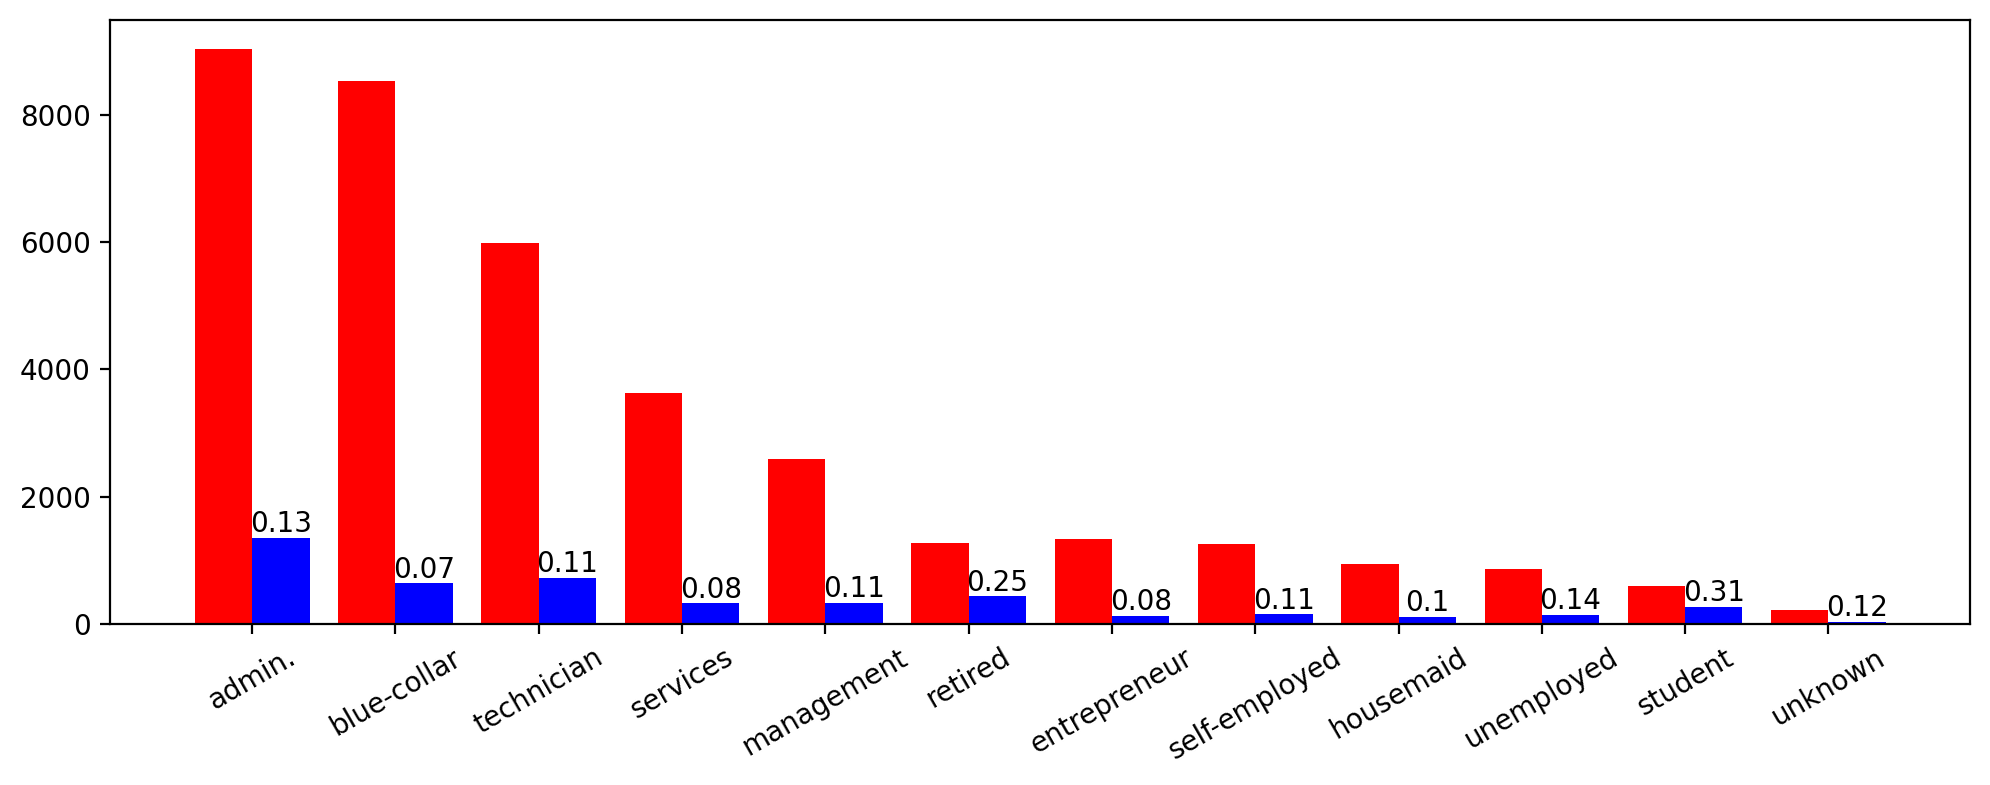

marital
              a      b     c     d
married   24692  22173  2519  0.10
single    11499   9884  1615  0.14
divorced   4585   4113   472  0.10
unknown      72     62    10  0.14


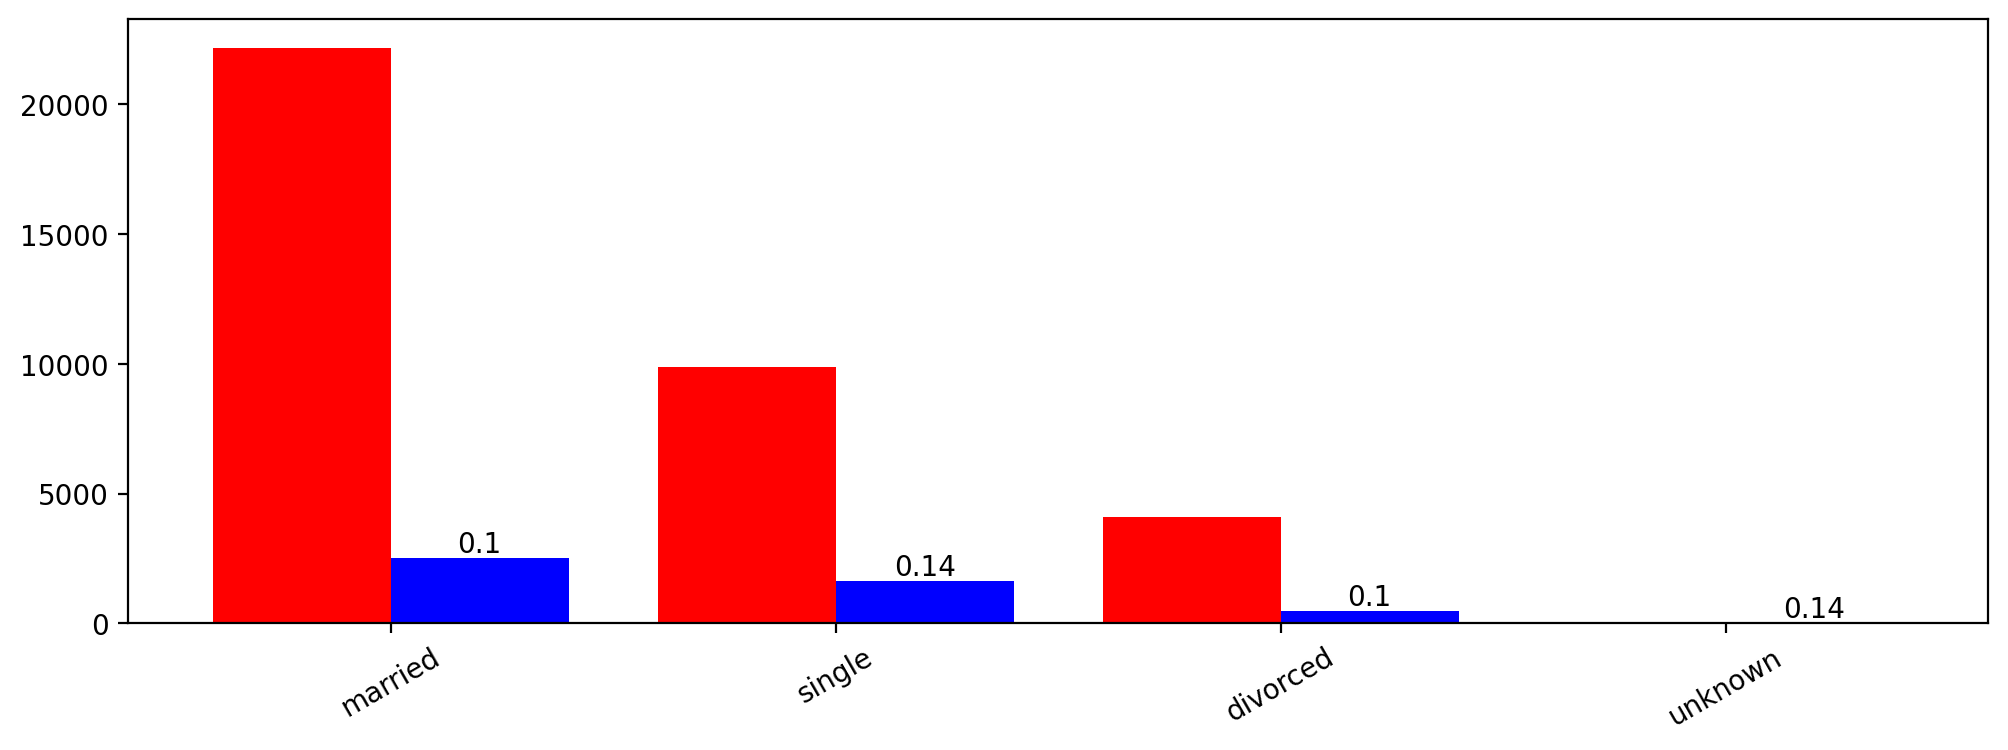

education
                         a      b     c     d
university.degree    12124  10457  1667  0.14
high.school           9478   8449  1029  0.11
basic.9y              6007   5534   473  0.08
professional.course   5220   4626   594  0.11
basic.4y              4121   3695   426  0.10
basic.6y              2267   2083   184  0.08
unknown               1613   1374   239  0.15
illiterate              18     14     4  0.22


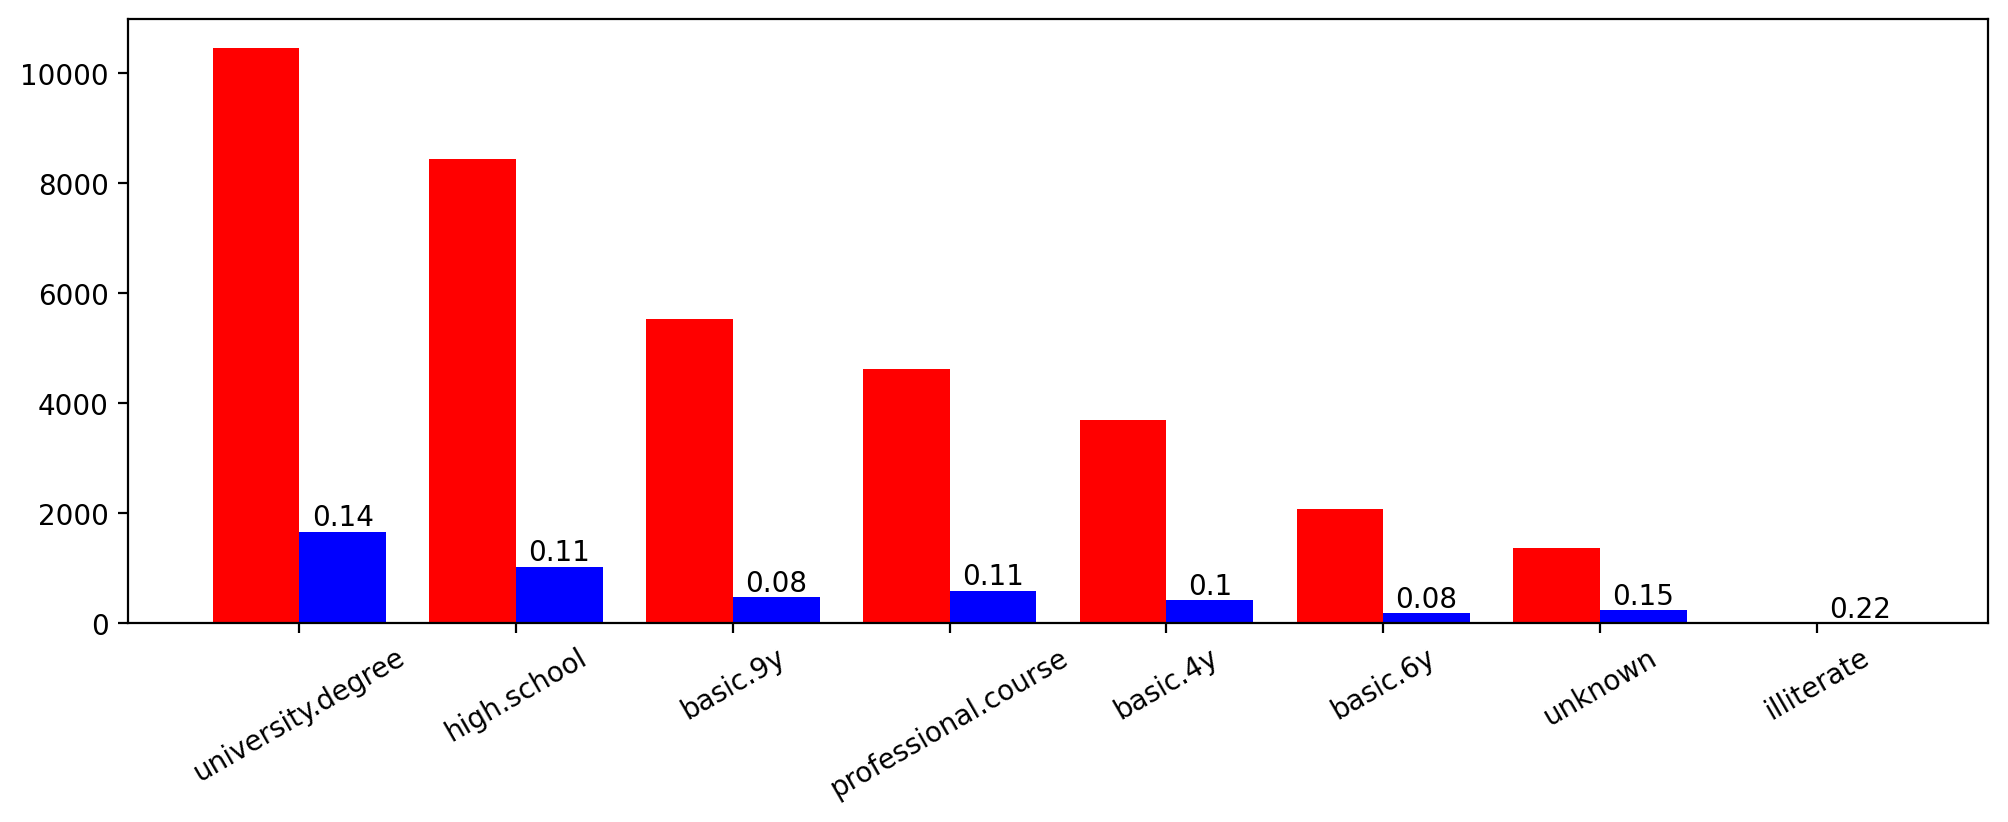

default
             a      b     c     d
no       32550  28361  4189  0.13
unknown   8295   7868   427  0.05
yes          3      3     0  0.00


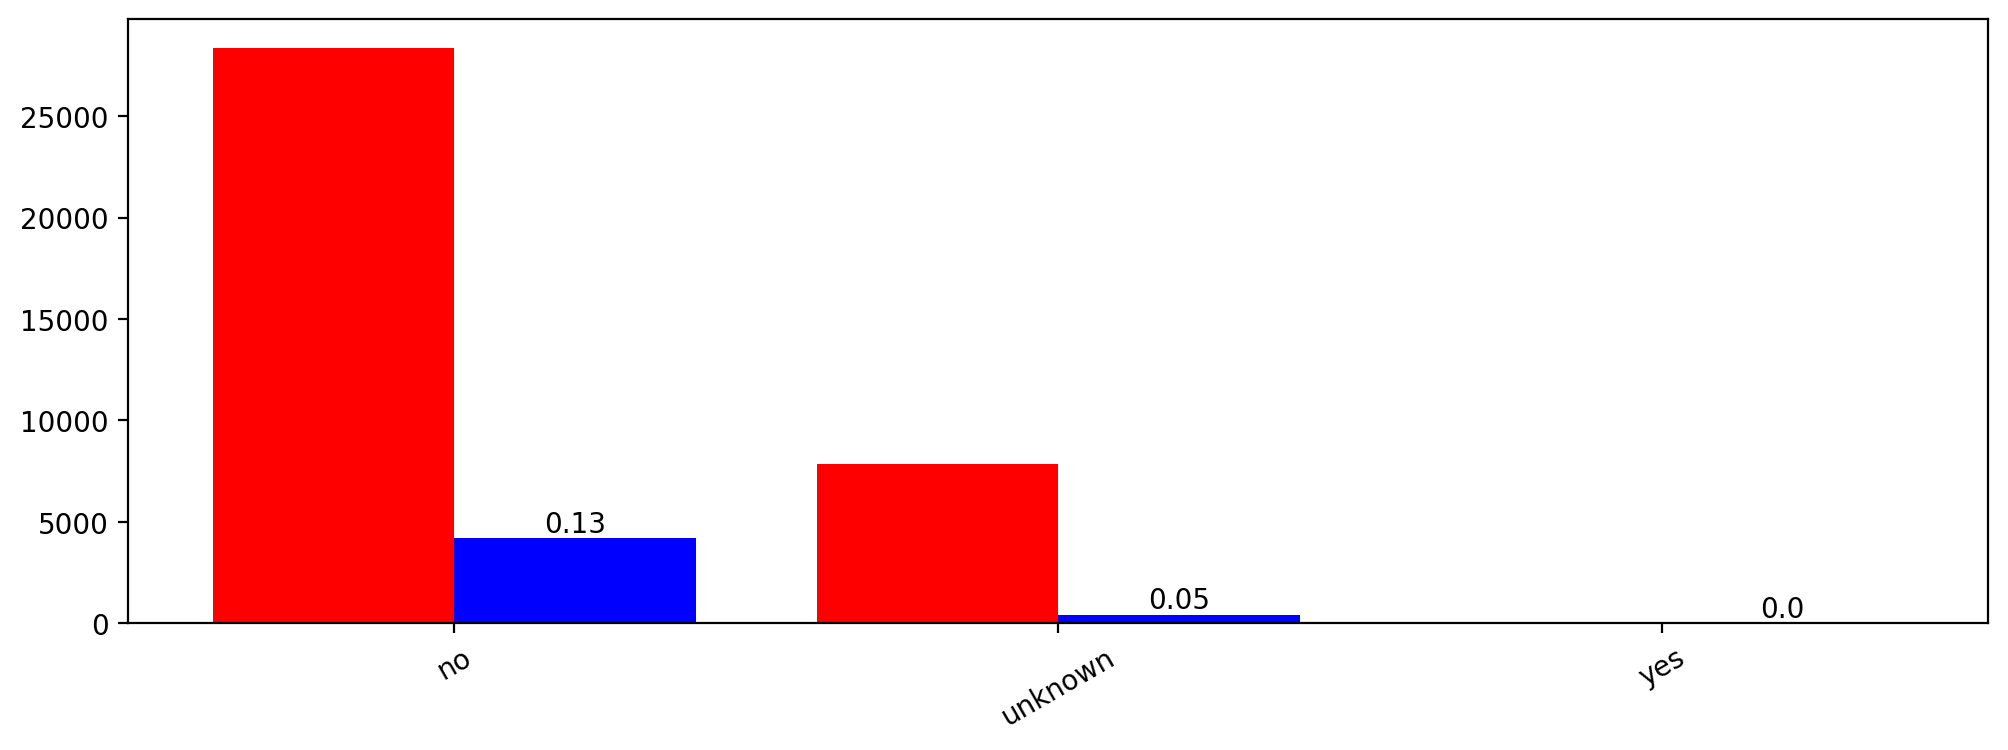

housing
             a      b     c     d
yes      21522  19021  2501  0.12
no       18587  16563  2024  0.11
unknown    739    648    91  0.12


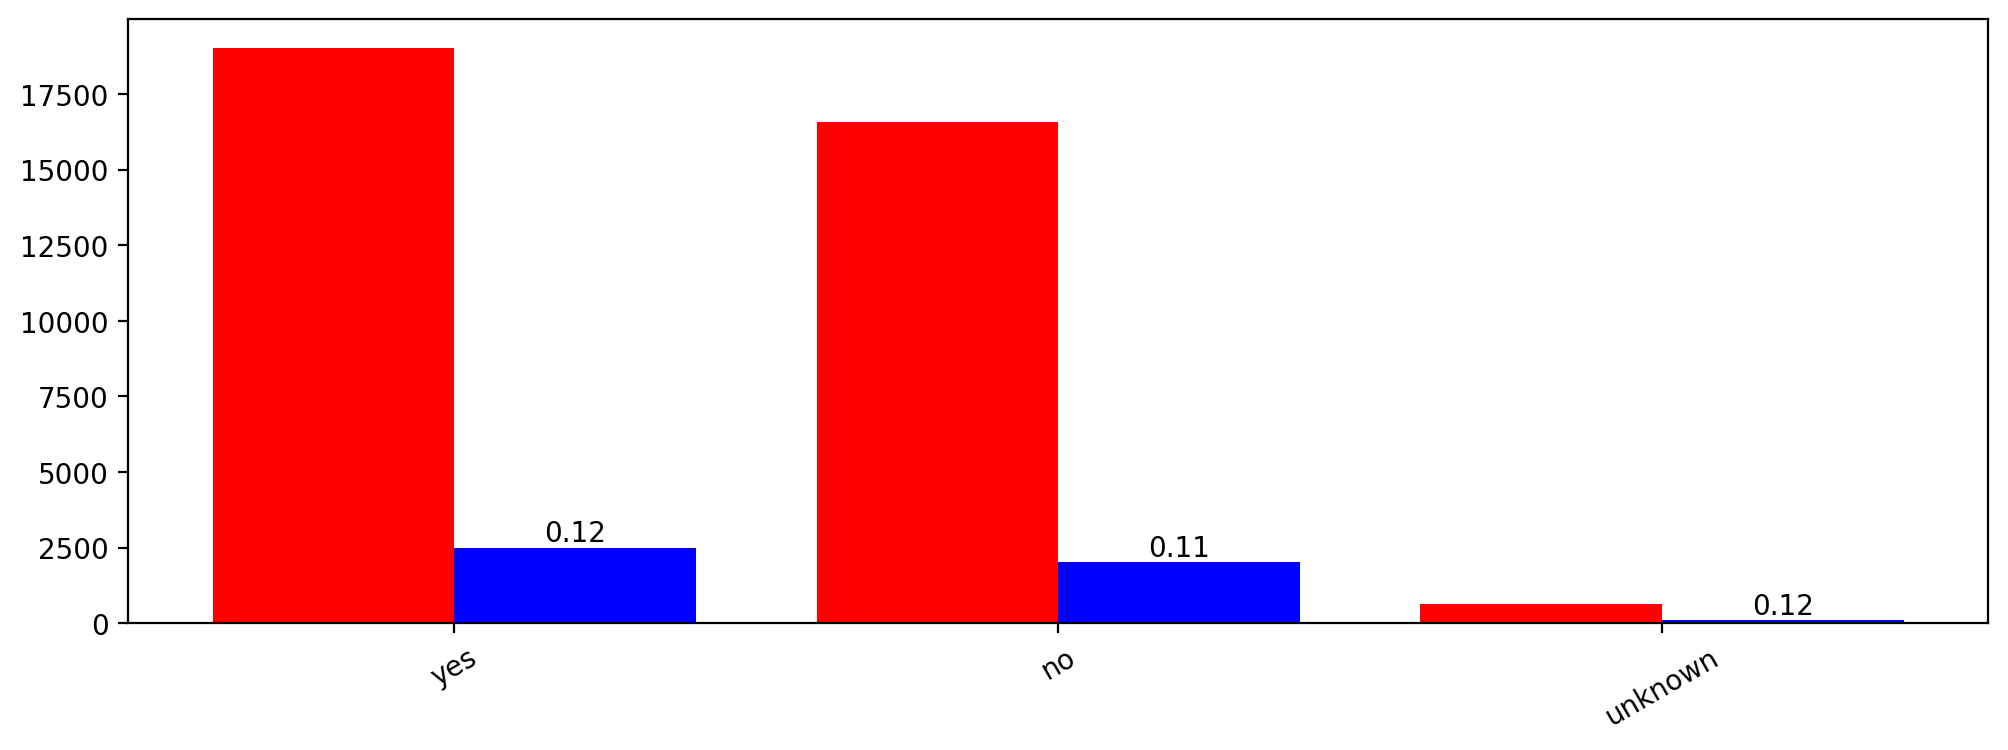

loan
             a      b     c     d
no       33867  30023  3844  0.11
yes       6242   5561   681  0.11
unknown    739    648    91  0.12


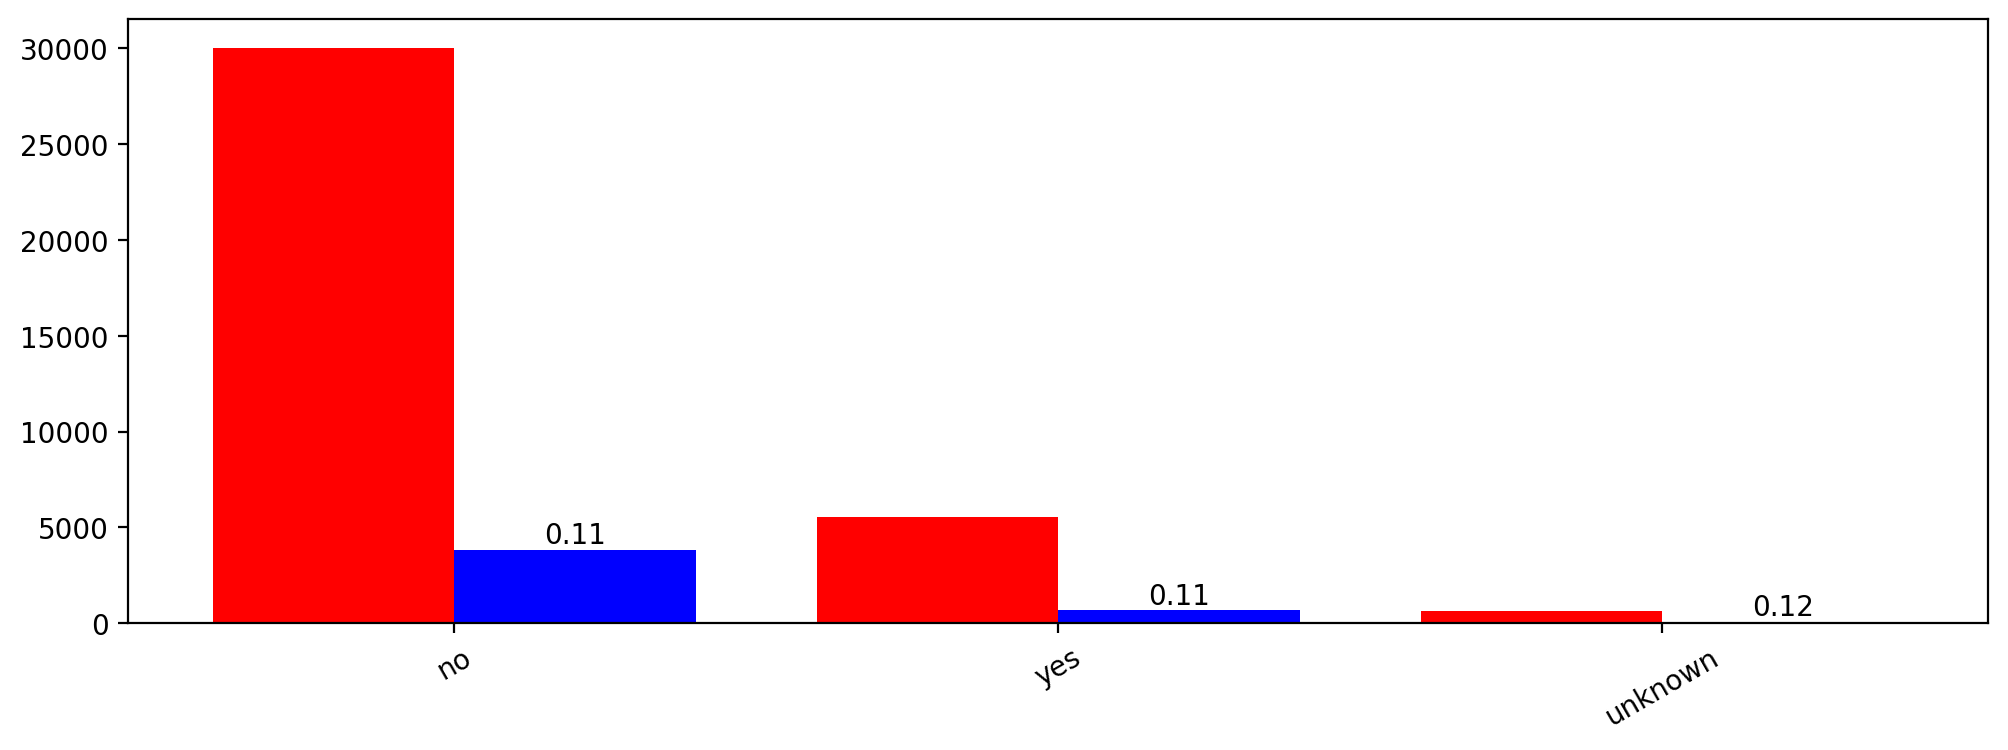

contact
               a      b     c     d
cellular   25998  22163  3835  0.15
telephone  14850  14069   781  0.05


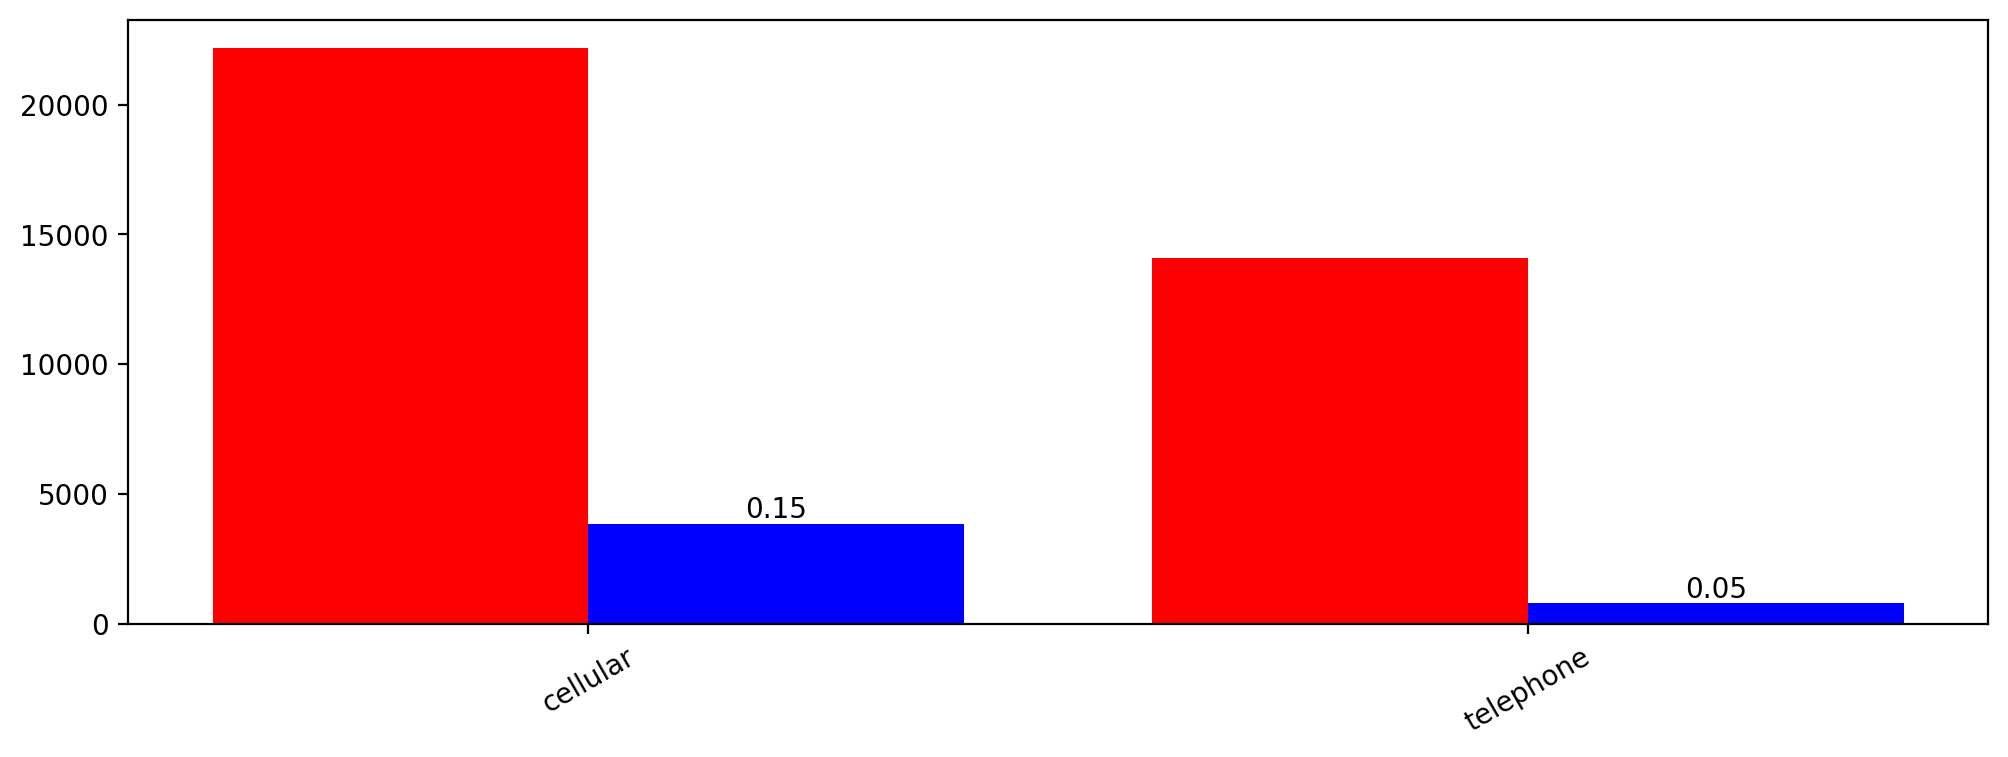

month
         a      b    c     d
may  13628  12747  881  0.06
jul   7111   6468  643  0.09
aug   6133   5481  652  0.11
jun   5256   4698  558  0.11
nov   4089   3676  413  0.10
apr   2624   2087  537  0.20
oct    715    401  314  0.44
sep    567    313  254  0.45
mar    544    269  275  0.51
dec    181     92   89  0.49


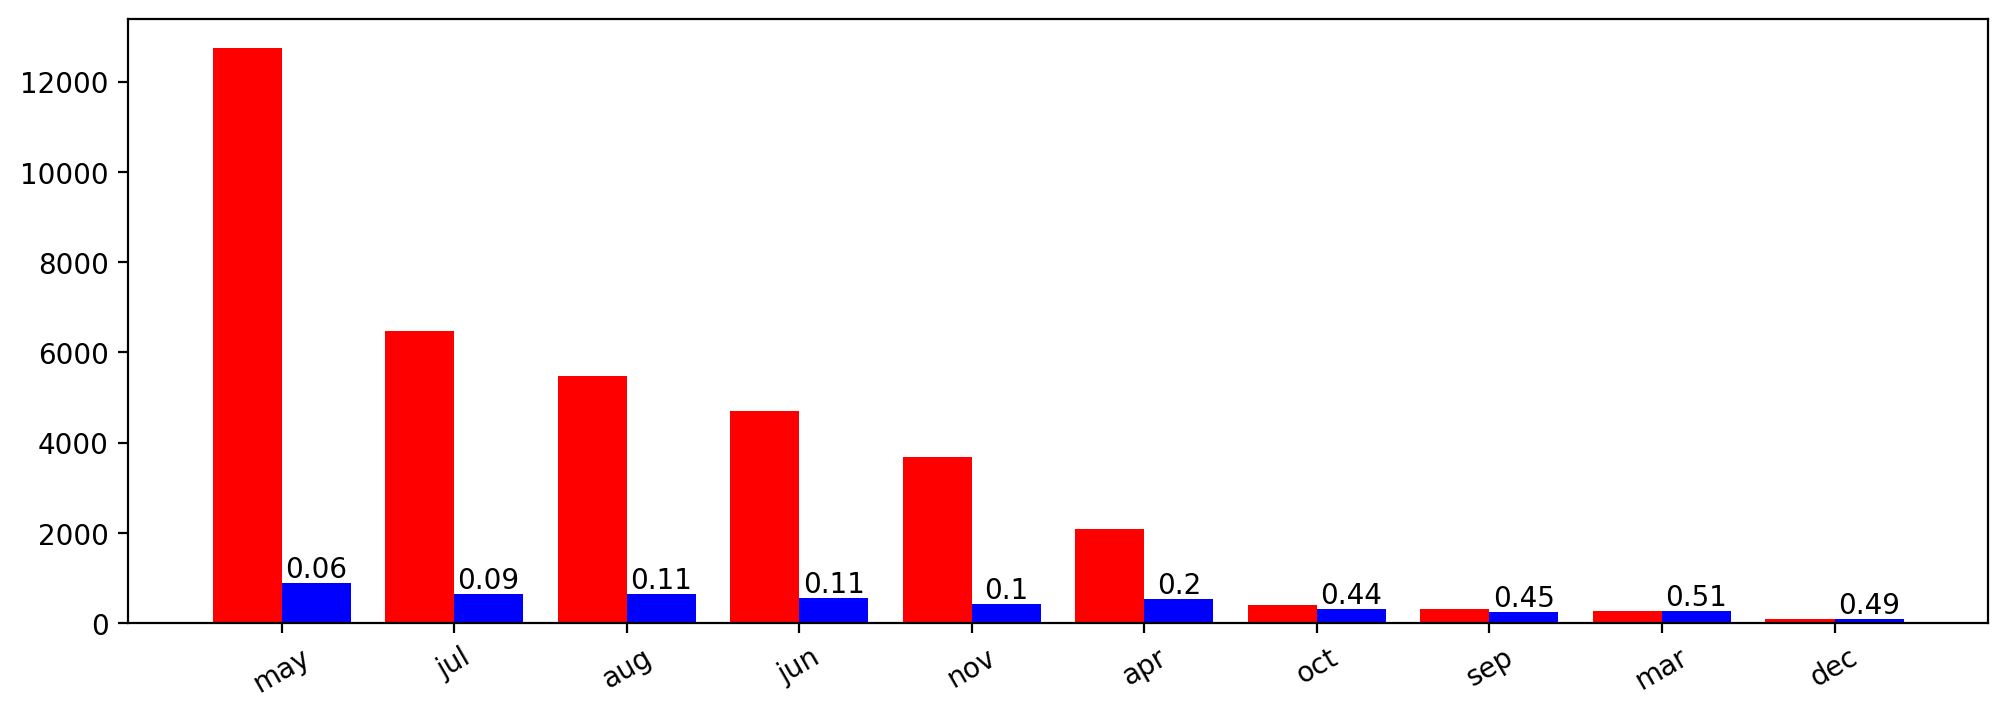

day_of_week
        a     b     c     d
thu  8568  7525  1043  0.12
mon  8442  7601   841  0.10
wed  8065  7123   942  0.12
tue  8019  7071   948  0.12
fri  7754  6912   842  0.11


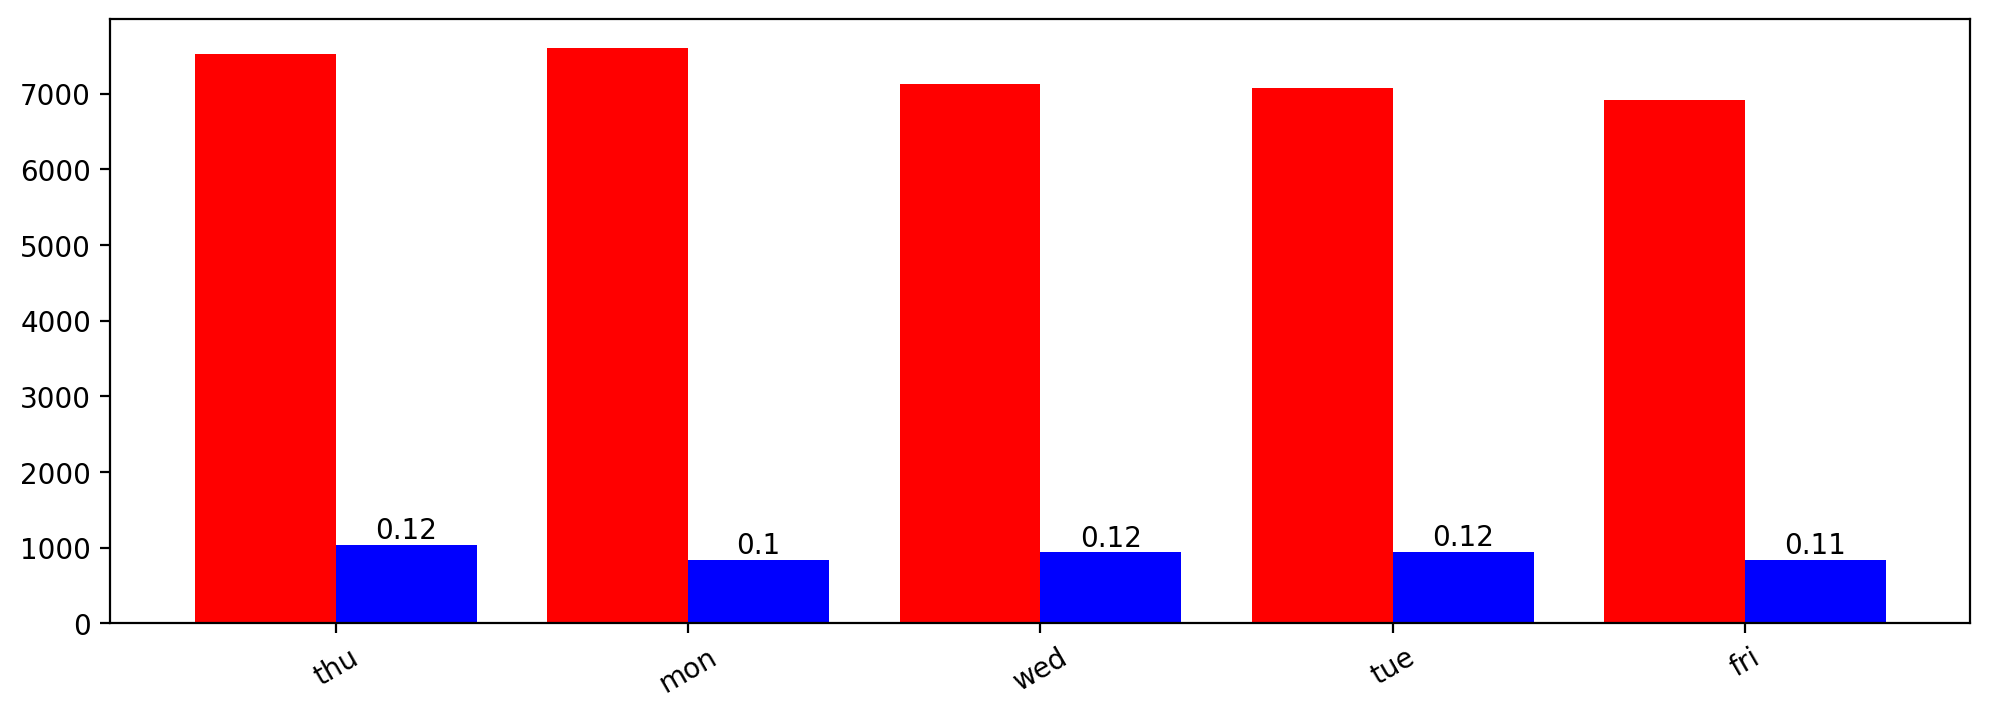

poutcome
                 a      b     c     d
nonexistent  35245  32119  3126  0.09
failure       4234   3635   599  0.14
success       1369    478   891  0.65


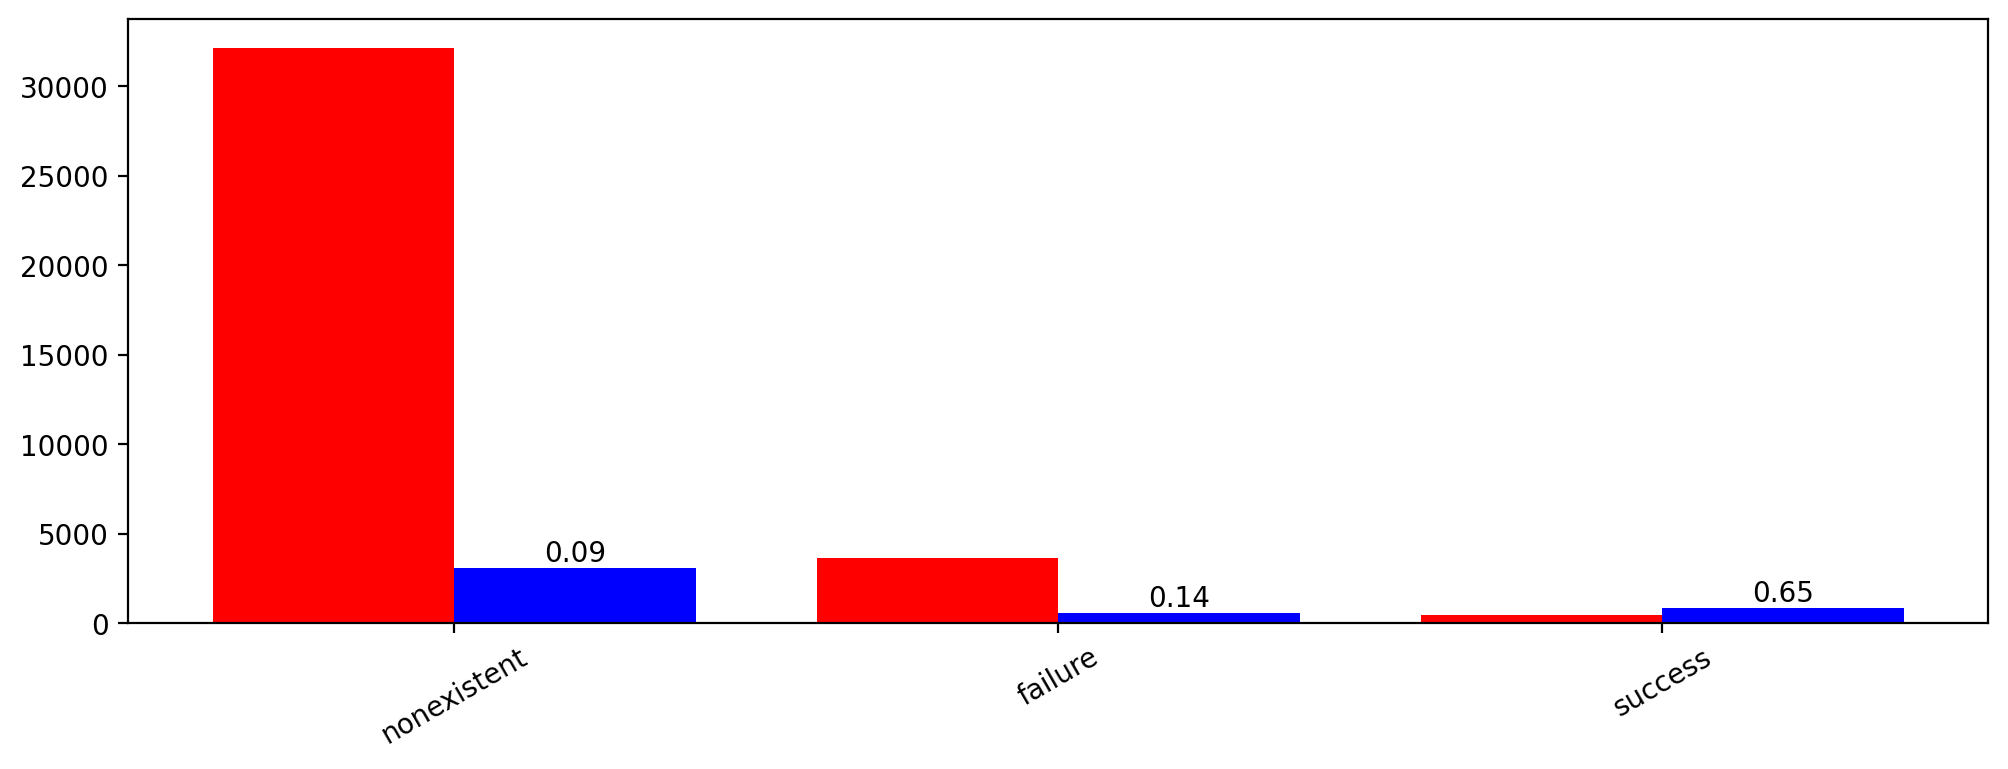

In [17]:
def dis(name):
    print(name)
    a = pd.DataFrame()
    a['a']=full_data[name].value_counts()


    a['b'] = a.apply (lambda row: len(full_data[(full_data[name]==row.name) & (full_data['y']==0)].index), axis=1)
    a['c'] = a.apply (lambda row: len(full_data[(full_data[name]==row.name) & (full_data['y']==1)].index), axis=1)
    a['d'] = a.apply (lambda row: round((row['c']/row['a']), 2), axis=1)
    print(a)

    # a['b']=a['b'].apply(lambda x: round(x, 2))
    # create a dataset
    height_b =  a['b'].values
    height_c =  a['c'].values
    bars =  a.index
    x_pos = np.arange(len(bars))

    # Create bars
    plt.figure(figsize=(12, 4), dpi=200)
    er_b=plt.bar(x_pos - 0.2, height_b, 0.4, color='red',label = 'Girls')
    er_c=plt.bar(x_pos + 0.2, height_c, 0.4, color='blue',label = 'Girls')
    # Create names on the x-axis

    plt.bar_label(er_c, labels=a['d'])

    plt.xticks(x_pos, bars,rotation=30)
    plt.show()


categorical_columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


for n in cater:
    dis(n)

In [18]:
def dis(name):
    print(full_data[[name, 'y']].groupby([name]).mean().sort_values(by='y', ascending=False))
    print('--')
    print(full_data[name].value_counts(normalize=True))
    print('----')
categorical_columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'previous', 'poutcome']

for n in categorical_columns:
    dis(n)

                      y
job                    
student        0.312644
retired        0.253372
unemployed     0.142147
admin.         0.130054
unknown        0.120000
management     0.112637
technician     0.108378
self-employed  0.105114
housemaid      0.100287
entrepreneur   0.084886
services       0.081348
blue-collar    0.069440
--
admin.           0.254309
blue-collar      0.224222
technician       0.164219
services         0.096602
management       0.071289
retired          0.041740
entrepreneur     0.035473
self-employed    0.034469
housemaid        0.025632
unemployed       0.024628
student          0.021298
unknown          0.006120
Name: job, dtype: float64
----
                 y
marital           
single    0.140447
unknown   0.138889
divorced  0.102944
married   0.102017
--
married     0.604485
single      0.281507
divorced    0.112245
unknown     0.001763
Name: marital, dtype: float64
----
                            y
education                    
illiterate           0

KeyError: "['day'] not in index"

In [ ]:

numerical_columns=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
def sss(name):
    g = sns.FacetGrid(full_data, col='y')
    g.map(plt.hist, name, bins=20)

for a in numer:
    sss(a)

In [ ]:
numerical_columns=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
def sss2(name):
    print(name)
    (n, bins, patches) = plt.hist(full_data[name], bins=10, label='hst')
    plt.hist(full_data[full_data['y']==1][name], bins=10, label='hst')
    print(n)
    print(bins)
    print(patches)
    plt.show()
for a in numer:
    sss2(a)

In [ ]:
def dis(name):
    print(name)
    a = pd.DataFrame()
    a['a']=full_data[name].value_counts()


    a['b'] = a.apply (lambda row: len(full_data[(full_data[name]==row.name) & (full_data['y']==0)].index), axis=1)
    a['c'] = a.apply (lambda row: len(full_data[(full_data[name]==row.name) & (full_data['y']==1)].index), axis=1)
    a['d'] = a.apply (lambda row: round((row['c']/row['a']), 2), axis=1)
    print(a)

    # a['b']=a['b'].apply(lambda x: round(x, 2))
    # create a dataset
    height_b =  a['b'].values
    height_c =  a['c'].values
    bars =  a.index
    x_pos = np.arange(len(bars))

    # Create bars
    plt.figure(figsize=(12, 4), dpi=200)
    er_b=plt.bar(x_pos - 0.2, height_b, 0.4, color='red',label = 'Girls')
    er_c=plt.bar(x_pos + 0.2, height_c, 0.4, color='blue',label = 'Girls')
    # Create names on the x-axis

    plt.bar_label(er_c, labels=a['d'])

    plt.xticks(x_pos, bars)
    plt.show()


categorical_columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


for n in numer:
    dis(n)

obrazki data

In [ ]:
# full_data['age']=full_data['age'].str.replace('"', '')
# full_data['job']=full_data['job'].str.replace('"', '')
# full_data['marital']=full_data['marital'].str.replace('"', '')
# full_data['education']=full_data['education'].str.replace('"', '')
# full_data['default']=full_data['default'].str.replace('"', '')
#
# full_data['housing']=full_data['housing'].str.replace('"', '')
# full_data['loan']=full_data['loan'].str.replace('"', '')
# full_data['contact']=full_data['contact'].str.replace('"', '')
#
# full_data['month']=full_data['month'].str.replace('"', '')
#
# full_data['poutcome']=full_data['poutcome'].str.replace('"', '')
# full_data['y']=full_data['y'].str.replace('"', '')
# full_data.head(20)

In [ ]:

# full_data['age']=full_data['age'].str.split(',')
# full_data['age']=full_data['age'].apply(lambda x:x[1])
# full_data = full_data.astype({"age": 'int64'}, errors='raise')
# full_data.head()

In [ ]:

label_encoder = LabelEncoder()
full_data['y'] = label_encoder.fit_transform(full_data['y'])

Data Inspections

In [ ]:
full_data.info()

In [19]:
def dis(name):
    print(full_data[[name, 'y']].groupby([name]).mean().sort_values(by='y', ascending=False))
    print('--')
    print(full_data[name].value_counts(normalize=True))
    print('----')
cat=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'previous', 'poutcome']

for n in cat:
    dis(n)

                      y
job                    
student        0.312644
retired        0.253372
unemployed     0.142147
admin.         0.130054
unknown        0.120000
management     0.112637
technician     0.108378
self-employed  0.105114
housemaid      0.100287
entrepreneur   0.084886
services       0.081348
blue-collar    0.069440
--
admin.           0.254309
blue-collar      0.224222
technician       0.164219
services         0.096602
management       0.071289
retired          0.041740
entrepreneur     0.035473
self-employed    0.034469
housemaid        0.025632
unemployed       0.024628
student          0.021298
unknown          0.006120
Name: job, dtype: float64
----
                 y
marital           
single    0.140447
unknown   0.138889
divorced  0.102944
married   0.102017
--
married     0.604485
single      0.281507
divorced    0.112245
unknown     0.001763
Name: marital, dtype: float64
----
                            y
education                    
illiterate           0

KeyError: "['day'] not in index"

KeyError: "None of [Index(['balance'], dtype='object')] are in the [columns]"

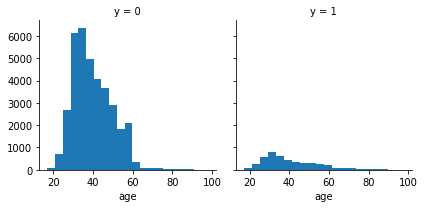

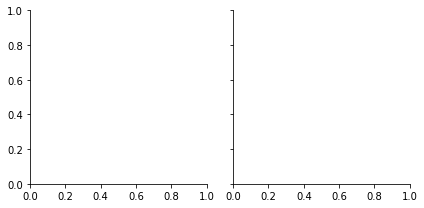

In [20]:
num=['age', 'balance','month', 'day', 'duration', 'campaign', 'pdays', 'previous']
def sss(name):
    g = sns.FacetGrid(full_data, col='y')
    g.map(plt.hist, name, bins=20)

for a in num:
    sss(a)

In [ ]:
# full_data['balance'] = np.where(full_data['balance'] > 60000, full_data['balance'].mean(), full_data['balance'])
# full_data['duration'] = np.where(full_data['duration'] > 2000, full_data['duration'].mean(), full_data['duration'])
# full_data['campaign'] = np.where(full_data['campaign'] > 35, full_data['campaign'].mean(), full_data['campaign'])
# full_data['pdays'] = np.where(full_data['pdays'] > 350, full_data['pdays'].mean(), full_data['pdays'])
# full_data['previous'] = np.where(full_data['previous'] > 30, full_data['previous'].mean(), full_data['previous'])

# full_data['age'] = np.where(full_data['age'] > 65, full_data['age'].mean(), full_data['age'])
# full_data['balance'] = np.where(full_data['balance'] > 6000, full_data['balance'].mean(), full_data['balance'])
# full_data['duration'] = np.where(full_data['duration'] > 2000, full_data['duration'].mean(), full_data['duration'])
# full_data['campaign'] = np.where(full_data['campaign'] > 10, full_data['campaign'].mean(), full_data['campaign'])
# full_data['pdays'] = np.where(full_data['pdays'] > 35, full_data['pdays'].mean(), full_data['pdays'])
# full_data['previous'] = np.where(full_data['previous'] > 5, full_data['previous'].mean(), full_data['previous'])




age: 
              range  population  sway
0   (16.919, 21.05]         240  0.35
1     (21.05, 25.1]        1417  0.18
2     (25.1, 29.15]        3986  0.14
3     (29.15, 33.2]        7308  0.11
4     (33.2, 37.25]        6732  0.10
5     (37.25, 41.3]        5234  0.09
6     (41.3, 45.35]        4267  0.08
7     (45.35, 49.4]        3734  0.08
8     (49.4, 53.45]        3093  0.10
9     (53.45, 57.5]        2637  0.10
10    (57.5, 61.55]        1372  0.16
11    (61.55, 65.6]         216  0.42
12    (65.6, 69.65]         147  0.46
13    (69.65, 73.7]         166  0.39
14    (73.7, 77.75]         110  0.52
15    (77.75, 81.8]          90  0.50
16    (81.8, 85.85]          56  0.52
17    (85.85, 89.9]          33  0.52
18    (89.9, 93.95]           6  0.50
19    (93.95, 98.0]           4  0.50
----


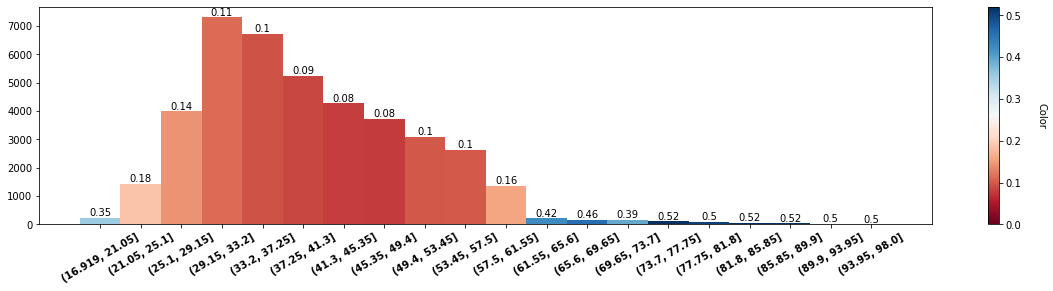

pdays: 
              range  population  sway
0   (-0.999, 49.95]        1511  0.64
1     (49.95, 99.9]           0   NaN
2    (99.9, 149.85]           0   NaN
3   (149.85, 199.8]           0   NaN
4   (199.8, 249.75]           0   NaN
5   (249.75, 299.7]           0   NaN
6   (299.7, 349.65]           0   NaN
7   (349.65, 399.6]           0   NaN
8   (399.6, 449.55]           0   NaN
9   (449.55, 499.5]           0   NaN
10  (499.5, 549.45]           0   NaN
11  (549.45, 599.4]           0   NaN
12  (599.4, 649.35]           0   NaN
13  (649.35, 699.3]           0   NaN
14  (699.3, 749.25]           0   NaN
15  (749.25, 799.2]           0   NaN
16  (799.2, 849.15]           0   NaN
17  (849.15, 899.1]           0   NaN
18  (899.1, 949.05]           0   NaN
19  (949.05, 999.0]       39337  0.09
----


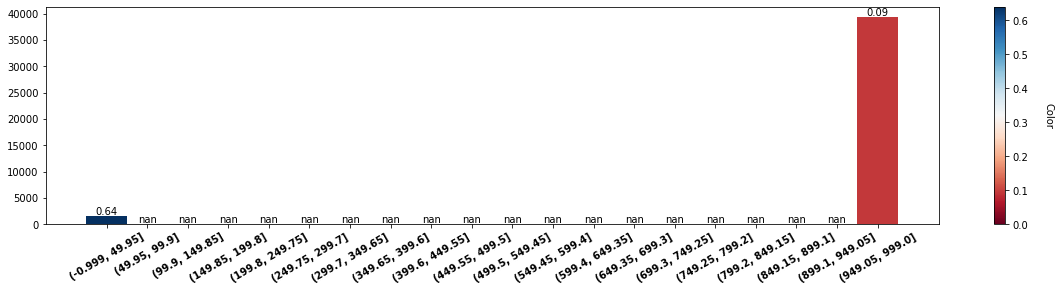

previous: 
             range  population  sway
0   (-0.007, 0.35]       35245  0.09
1      (0.35, 0.7]           0   NaN
2      (0.7, 1.05]        4543  0.21
3      (1.05, 1.4]           0   NaN
4      (1.4, 1.75]           0   NaN
5      (1.75, 2.1]         751  0.46
6      (2.1, 2.45]           0   NaN
7      (2.45, 2.8]           0   NaN
8      (2.8, 3.15]         215  0.59
9      (3.15, 3.5]           0   NaN
10     (3.5, 3.85]           0   NaN
11     (3.85, 4.2]          70  0.54
12     (4.2, 4.55]           0   NaN
13     (4.55, 4.9]           0   NaN
14     (4.9, 5.25]          18  0.72
15     (5.25, 5.6]           0   NaN
16     (5.6, 5.95]           0   NaN
17     (5.95, 6.3]           5  0.60
18     (6.3, 6.65]           0   NaN
19     (6.65, 7.0]           1  0.00
----


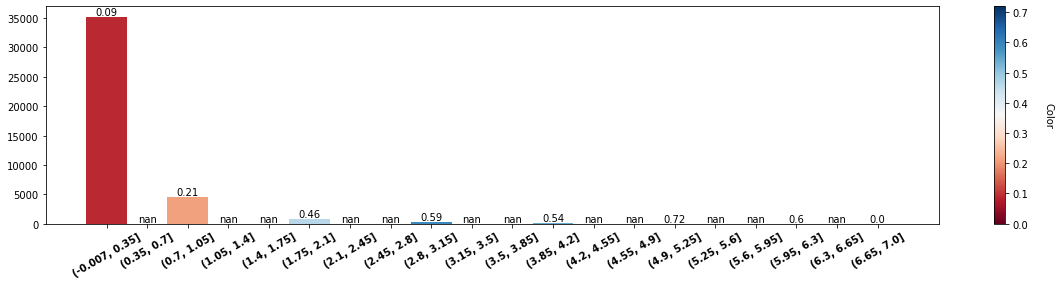

emp.var.rate: 
              range  population  sway
0   (-3.405, -3.16]        1066  0.42
1    (-3.16, -2.92]         171  0.51
2    (-2.92, -2.68]        1659  0.36
3    (-2.68, -2.44]           0   NaN
4     (-2.44, -2.2]           0   NaN
5     (-2.2, -1.96]           0   NaN
6    (-1.96, -1.72]        9151  0.16
7    (-1.72, -1.48]         771  0.52
8    (-1.48, -1.24]           0   NaN
9     (-1.24, -1.0]         632  0.47
10    (-1.0, -0.76]           0   NaN
11   (-0.76, -0.52]           0   NaN
12   (-0.52, -0.28]           0   NaN
13   (-0.28, -0.04]        3683  0.06
14     (-0.04, 0.2]           0   NaN
15      (0.2, 0.44]           0   NaN
16     (0.44, 0.68]           0   NaN
17     (0.68, 0.92]           0   NaN
18     (0.92, 1.16]        7645  0.03
19      (1.16, 1.4]       16070  0.05
----


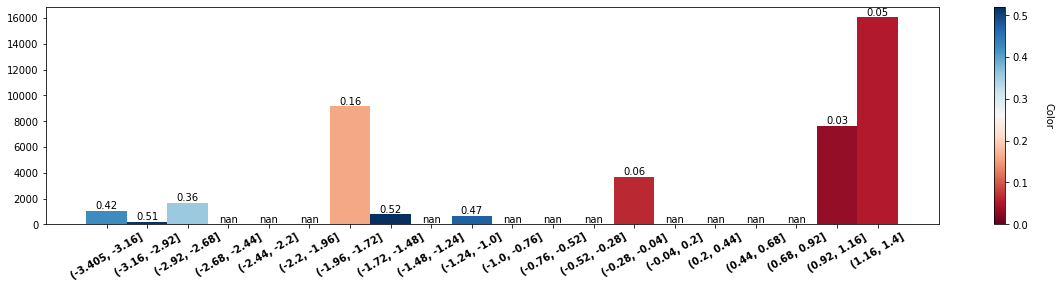

cons.price.idx: 
               range  population  sway
0   (92.198, 92.329]         768  0.34
1   (92.329, 92.458]         711  0.40
2   (92.458, 92.586]         176  0.37
3   (92.586, 92.714]         526  0.48
4   (92.714, 92.842]          10  0.10
5   (92.842, 92.971]        6767  0.13
6   (92.971, 93.099]        2450  0.18
7   (93.099, 93.227]        3606  0.05
8   (93.227, 93.356]           0   NaN
9   (93.356, 93.484]        5395  0.08
10  (93.484, 93.612]           0   NaN
11  (93.612, 93.741]           0   NaN
12  (93.741, 93.869]         241  0.58
13  (93.869, 93.997]       14483  0.05
14  (93.997, 94.126]         462  0.49
15  (94.126, 94.254]         610  0.53
16  (94.254, 94.382]           0   NaN
17   (94.382, 94.51]        4312  0.04
18   (94.51, 94.639]         203  0.45
19  (94.639, 94.767]         128  0.45
----


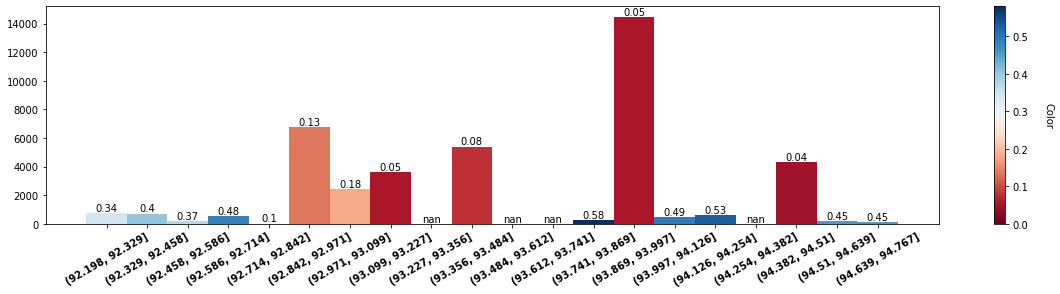

cons.conf.idx: 
                 range  population  sway
0   (-50.824, -49.605]         409  0.45
1    (-49.605, -48.41]         203  0.45
2    (-48.41, -47.215]           0   NaN
3    (-47.215, -46.02]        8221  0.12
4    (-46.02, -44.825]          10  0.10
5    (-44.825, -43.63]           0   NaN
6    (-43.63, -42.435]        6626  0.06
7    (-42.435, -41.24]        7918  0.05
8    (-41.24, -40.045]        1091  0.44
9    (-40.045, -38.85]         441  0.52
10   (-38.85, -37.655]         233  0.52
11   (-37.655, -36.46]         301  0.49
12   (-36.46, -35.265]       12777  0.04
13   (-35.265, -34.07]         437  0.57
14   (-34.07, -32.875]         347  0.44
15   (-32.875, -31.68]           0   NaN
16   (-31.68, -30.485]         768  0.34
17   (-30.485, -29.29]         621  0.44
18   (-29.29, -28.095]           0   NaN
19    (-28.095, -26.9]         445  0.40
----


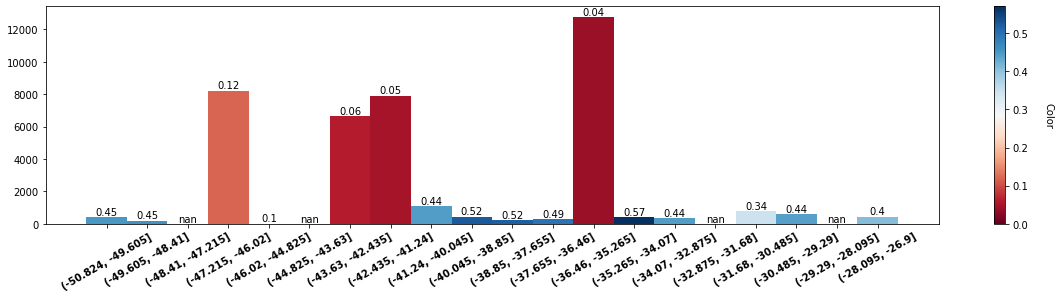

euribor3m: 
             range  population  sway
0    (0.63, 0.855]        2491  0.47
1   (0.855, 1.075]        1735  0.43
2   (1.075, 1.296]        3864  0.15
3   (1.296, 1.516]        5090  0.13
4   (1.516, 1.737]         202  0.45
5   (1.737, 1.957]          68  0.46
6   (1.957, 2.178]           0   NaN
7   (2.178, 2.398]           0   NaN
8   (2.398, 2.619]           0   NaN
9   (2.619, 2.839]           0   NaN
10   (2.839, 3.06]           1  1.00
11   (3.06, 3.281]           0   NaN
12  (3.281, 3.501]           4  0.00
13  (3.501, 3.722]           3  0.00
14  (3.722, 3.942]           6  0.00
15  (3.942, 4.163]        2936  0.05
16  (4.163, 4.383]         634  0.04
17  (4.383, 4.604]          13  0.38
18  (4.604, 4.824]          27  0.48
19  (4.824, 5.045]       23774  0.05
----


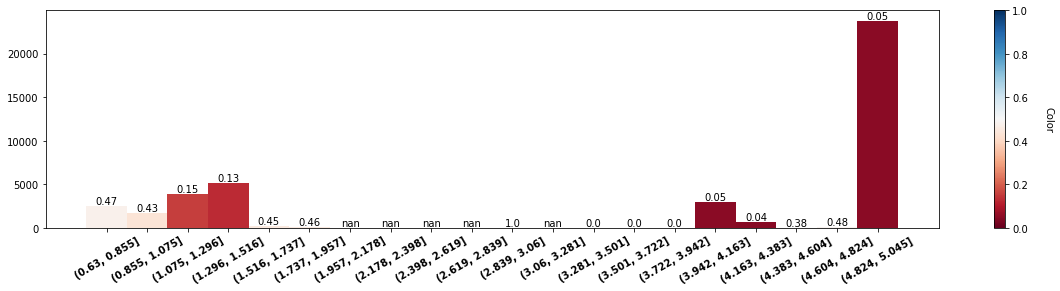

nr.employed: 
                   range  population  sway
0   (4963.336, 4976.825]         632  0.47
1    (4976.825, 4990.05]           0   NaN
2    (4990.05, 5003.275]         771  0.52
3     (5003.275, 5016.5]         649  0.57
4     (5016.5, 5029.725]        1237  0.44
5    (5029.725, 5042.95]           0   NaN
6    (5042.95, 5056.175]           0   NaN
7     (5056.175, 5069.4]           0   NaN
8     (5069.4, 5082.625]        1659  0.36
9    (5082.625, 5095.85]           0   NaN
10   (5095.85, 5109.075]        8502  0.13
11    (5109.075, 5122.3]           0   NaN
12    (5122.3, 5135.525]           0   NaN
13   (5135.525, 5148.75]           0   NaN
14   (5148.75, 5161.975]           0   NaN
15    (5161.975, 5175.2]           0   NaN
16    (5175.2, 5188.425]          10  0.10
17   (5188.425, 5201.65]       11318  0.04
18   (5201.65, 5214.875]           0   NaN
19    (5214.875, 5228.1]       16070  0.05
----


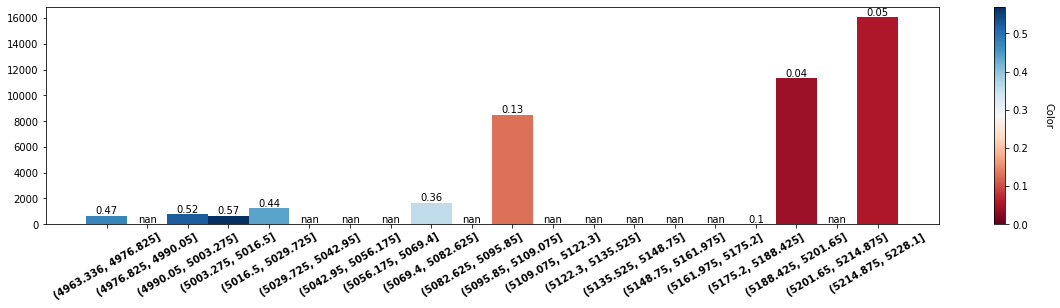

In [21]:
from matplotlib.cm import ScalarMappable

def dis2(name):
    print(name+": ")
    new_name=name+"_band"
    full_data[new_name] = pd.cut(full_data[name], 20)
    bars1= pd.DataFrame()
    bars4=full_data[[new_name, 'y']].groupby([new_name], as_index=False).mean().sort_values(by=new_name, ascending=True)[new_name]
    bars5=full_data[[new_name, 'y']].groupby([new_name], as_index=False).mean().sort_values(by=new_name, ascending=True)['y']
    bars6=full_data[new_name].value_counts(sort=False)

    bars6=bars6.set_axis(range(20))

    dataa = {'range': bars4,
        'sway': bars5,
        'population': bars6}
    dfd = pd.DataFrame(dataa)

    dfd['swayNorm'] = [x / max(dfd['sway']) for x in dfd['sway']]
    dfd['sway']=dfd['sway'].apply(lambda x:round(x,2))
    print(dfd[['range','population','sway']])
    print('----')

    fig, axs = plt.subplots(1, figsize=(20, 4))

    my_cmap = plt.cm.get_cmap('RdBu')
    colors = my_cmap(dfd['swayNorm'])
    sew=axs.bar(range(20), dfd['population'], color=colors, width=1)

    sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(dfd['sway'])))
    sm.set_array([])

    cbar = plt.colorbar(sm)
    cbar.set_label('Color', rotation=270,labelpad=25)
    # axs[1].bar(range(20), dfd['sway'], color='green', edgecolor='white', width=1)
    # axs[1].set_ylim([0, 1])
    plt.xticks(range(20),  dfd['range'], fontweight='bold',rotation=30)
    plt.bar_label(sew, labels=dfd['sway'])

    plt.show()
    plt.close()
to_dsplay_2=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for n in numer:
    dis2(n)

In [104]:
full_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,nr.employed,y,age_band,pdays_band,previous_band,emp.var.rate_band,cons.price.idx_band,cons.conf.idx_band,euribor3m_band,nr.employed_band
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,5191.0,0,"(53.45, 57.5]","(949.05, 999.0]","(-0.007, 0.35]","(0.92, 1.16]","(93.869, 93.997]","(-36.46, -35.265]","(4.824, 5.045]","(5188.425, 5201.65]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,5191.0,0,"(53.45, 57.5]","(949.05, 999.0]","(-0.007, 0.35]","(0.92, 1.16]","(93.869, 93.997]","(-36.46, -35.265]","(4.824, 5.045]","(5188.425, 5201.65]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,5191.0,0,"(33.2, 37.25]","(949.05, 999.0]","(-0.007, 0.35]","(0.92, 1.16]","(93.869, 93.997]","(-36.46, -35.265]","(4.824, 5.045]","(5188.425, 5201.65]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,5191.0,0,"(37.25, 41.3]","(949.05, 999.0]","(-0.007, 0.35]","(0.92, 1.16]","(93.869, 93.997]","(-36.46, -35.265]","(4.824, 5.045]","(5188.425, 5201.65]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,5191.0,0,"(53.45, 57.5]","(949.05, 999.0]","(-0.007, 0.35]","(0.92, 1.16]","(93.869, 93.997]","(-36.46, -35.265]","(4.824, 5.045]","(5188.425, 5201.65]"


In [20]:
full_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [21]:
full_data['y'].value_counts(normalize=True)

0    0.883015
1    0.116985
Name: y, dtype: float64

In [22]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int32 
dtypes: int32(1), int64(7), object(9)
memory usage: 5.7+ MB


In [23]:
full_data['loan'].value_counts(normalize=True)

no     0.839774
yes    0.160226
Name: loan, dtype: float64

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   # related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone")
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   # other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric)
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [24]:
# full_data[ 'loan' ].replace({'unknown':None},inplace=True)
# full_data[ 'loan' ].replace({'unknown':None},inplace=True)
# full_data[ 'loan' ].replace({'unknown':None},inplace=True)
# full_data[ 'loan' ].replace({'unknown':None},inplace=True)
# full_data[ 'loan' ].replace({'unknown':None},inplace=True)
# full_data[ 'loan' ].replace({'unknown':None},inplace=True)
# full_data[ 'loan' ].replace({'unknown':None},inplace=True)
# full_data[ 'loan' ].replace({'unknown':None},inplace=True)

In [25]:
# full_data['loan'].value_counts(normalize=True)

In [26]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int32 
dtypes: int32(1), int64(7), object(9)
memory usage: 5.7+ MB


In [27]:
from sklearn.preprocessing import LabelEncoder

# full_data[ 'y' == 'no'] = 0
# full_data[ 'y' == 'yes'] = 1
#
# full_data[ 'default' == 'no'] = 0
# full_data[ 'default' == 'yes'] = 1
#
# full_data[ 'housing' == 'no'] = 0
# full_data[ 'housing' == 'yes'] = 1
#
# full_data[ 'loan' == 'no'] = 0
# full_data[ 'loan' == 'yes'] = 1
label_encoder = LabelEncoder()
full_data['y'] = label_encoder.fit_transform(full_data['y'])
# full_data['default'] = label_encoder.fit_transform(full_data['default'])
# full_data['housing'] = label_encoder.fit_transform(full_data['housing'])
# full_data['loan'] = label_encoder.fit_transform(full_data['loan'])
# full_data['loan'] = label_encoder.fit_transform(full_data['loan'])
# full_data['loan'] = label_encoder.fit_transform(full_data['loan'])
# full_data['loan'] = label_encoder.fit_transform(full_data['loan'])
# full_data['loan'] = label_encoder.fit_transform(full_data['loan'])
full_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [28]:
full_data['y'].value_counts(normalize=True)

0    0.883015
1    0.116985
Name: y, dtype: float64

In [29]:
full_data.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


In [30]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [31]:
full_data.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [32]:
# dupa

In [33]:
full_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


train test split

In [34]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
# cut_data=full_data

_, cut_data = train_test_split(full_data, test_size=0.05, stratify=full_data['y'],random_state=62)
# cut_data=full_data.sample(frac=0.1, random_state=62)


X = cut_data.drop(['y'], axis=1)
y = cut_data['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=62)
print("X.shape: {} y.shape: {}".format(X_train.shape, y_train.shape))
print("X.shape: {} y.shape: {}".format(X_test.shape, y_test.shape))

# yesD=trainD[trainD['y'] == 1]
# noD=trainD[trainD['y'] == 0]
#
# noD=noD.sample(n=len(yesD.index),random_state=62)
#
#
# unD=pd.concat([yesD, noD],ignore_index=True)
# print(unD)
# _, unD2 = train_test_split(unD, test_size=0.3, stratify=unD['y'],random_state=62)
# X_train = unD2.drop(['y'], axis=1)
# y_train = unD2['y'].values
#
# X_test = testD.drop(['y'], axis=1)
# y_test = testD['y'].values


      age          job   marital  education default  balance housing loan  \
0      35   management    single   tertiary      no     1396     yes   no   
1      64   unemployed  divorced  secondary      no      588      no   no   
2      43       admin.    single  secondary      no      733     yes   no   
3      25      student    single    unknown      no     1003      no   no   
4      34   management   married   tertiary      no     3301     yes   no   
...   ...          ...       ...        ...     ...      ...     ...  ...   
9515   51   technician   married  secondary      no      614     yes   no   
9516   36   management   married  secondary      no     6077      no   no   
9517   35  blue-collar   married  secondary      no     6411     yes  yes   
9518   38     services   married  secondary      no      133     yes   no   
9519   49  blue-collar   married    primary      no      130      no   no   

       contact  day month  duration  campaign  pdays  previous poutcome  y 

pipeline definition

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["age","balance","day","campaign","pdays","previous"])),
        ("scaler", StandardScaler()),
        ("imputer", SimpleImputer(strategy="median")),
    ])

In [37]:
num_pipeline.fit_transform(X_train)

array([[ 1.48866315, -0.33507741, -0.32860127, -0.57966713,  0.37652088,
         0.02603747],
       [ 1.23104114,  0.59136367, -0.56547286, -0.57966713, -0.50288389,
        -0.35926308],
       [ 0.28642709, -0.59242215, -1.27608763, -0.57966713, -0.50288389,
        -0.35926308],
       ...,
       [-0.74406096,  0.03667723, -1.27608763, -0.57966713,  1.4617438 ,
         0.41133801],
       [-0.91580897, -0.34778962,  0.14514191,  0.56102831, -0.50288389,
        -0.35926308],
       [ 1.31691514, -0.37166377, -0.09172968, -0.57966713, -0.50288389,
        -0.35926308]])

In [38]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [39]:
# from future_encoders import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector([ "job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown = 'ignore')),
        ("scaler", StandardScaler())
    ])

In [40]:
cat_pipeline.fit_transform(X_train)

array([[-0.36329841, -0.46011933, -0.16756418, ..., -0.23210889,
         2.89204675, -1.64446957],
       [-0.36329841, -0.46011933, -0.16756418, ..., -0.23210889,
        -0.34577588,  0.60809882],
       [-0.36329841, -0.46011933, -0.16756418, ..., -0.23210889,
        -0.34577588,  0.60809882],
       ...,
       [ 2.75255819, -0.46011933, -0.16756418, ..., -0.23210889,
        -0.34577588, -1.64446957],
       [-0.36329841, -0.46011933, -0.16756418, ..., -0.23210889,
        -0.34577588,  0.60809882],
       [-0.36329841, -0.46011933, -0.16756418, ..., -0.23210889,
        -0.34577588,  0.60809882]])

In [41]:
from sklearn.pipeline import FeatureUnion

preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

model learing

In [42]:
from sklearn.model_selection import StratifiedKFold
models = []
seed=123
kfold = StratifiedKFold(n_splits=5)

In [43]:
def print_model_stats(model):
    X_test_pred=model.predict(X_test)
    print("precision_score: {}".format(metrics.precision_score(y_test, X_test_pred) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, X_test_pred) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, X_test_pred) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, X_test_pred) ))

In [44]:
from sklearn.base import ClassifierMixin

class CustomClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        pass

    def predict(self, X, y=None):
        return np.zeros((len(X)))

    def predict_proba(self, X, y=None):
        pass

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', CustomClassifier())])


param_grid = {

}

grid_44 = GridSearchCV(pipe, param_grid, cv=kfold)

grid_44.fit(X_train, y_train)
models.append(('log', grid_44.best_estimator_))
print(grid_44.best_params_)
print_model_stats(grid_44.best_estimator_)

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', LogisticRegression(max_iter=1000))])


param_grid = {
            'classifier__C': [ 0.01, 0.1, 1, 10, 100],
            'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none']
}

grid_4 = GridSearchCV(pipe, param_grid, cv=kfold)

grid_4.fit(X_train, y_train)

models.append(('log', grid_4.best_estimator_))
print(grid_4.best_params_)
print_model_stats(grid_4.best_estimator_)

C:\Users\wojte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\wojte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\wojte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\wojte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\wojte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

{'classifier__C': 0.01, 'classifier__penalty': 'none'}
precision_score: 0.26391096979332274
recall_score: 0.6275992438563327
f1_score: 0.37157246782316733
accuracy_score: 0.7516585581601062


C:\Users\wojte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\wojte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\wojte\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\wojte\AppData\Local\Prog

resoult comarison

In [52]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', SVC(kernel="rbf"))])


param_grid = {
            'classifier__gamma': [10**(-3), 10**(-2),10**(-1), 1, 10, 100,1000],
            'classifier__C': [ 10**(-2), 10**(-1), 1, 10**(1), 10**(2), 10**(3)]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold)

grid_1.fit(X_train, y_train)

models.append(('rbf', grid_1.best_estimator_))
print(grid_1.best_params_)
print_model_stats(grid_1.best_estimator_)


{'classifier__C': 100, 'classifier__gamma': 0.001}
precision_score: 0.314484126984127
recall_score: 0.5992438563327032
f1_score: 0.41249186727391024
accuracy_score: 0.8003095975232198


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', SVC(kernel='linear'))])


param_grid = {
            'classifier__C': [10**(-2), 10**(-1), 1, 10**(1), 10**(2)]
}

grid_2 = GridSearchCV(pipe, param_grid, cv=kfold)

grid_2.fit(X_train, y_train)


models.append(('linear', grid_2.best_estimator_))
print(grid_2.best_params_)
print_model_stats(grid_2.best_estimator_)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', SVC(kernel='poly'))])


param_grid = {
            'classifier__degree': [1,2,3,4],
            'classifier__C': [10**(-2), 10**(-1), 1, 10**(1), 10**(2)],
            'classifier__coef0': [0, 1]
}

grid_3 = GridSearchCV(pipe, param_grid, cv=kfold)

grid_3.fit(X_train, y_train)
models.append(('poly', grid_3.best_estimator_))
print(grid_3.best_params_)
print_model_stats(grid_3.best_estimator_)

deep shit

In [50]:
def show_history(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

C:\Users\wojte\AppData\Local\Temp\ipykernel_28492\146425813.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = keras.wrappers.scikit_learn.KerasClassifier(nn1, epochs=30, batch_size=200, validation_split=0.2)


Epoch 1/30
12/12 [==============================] - 2s 44ms/step - loss: 0.7501 - accuracy: 0.5963 - val_loss: 0.5864 - val_accuracy: 0.6906
Epoch 2/30
12/12 [==============================] - 0s 6ms/step - loss: 0.5867 - accuracy: 0.6896 - val_loss: 0.5729 - val_accuracy: 0.7115
Epoch 3/30
12/12 [==============================] - 0s 6ms/step - loss: 0.5707 - accuracy: 0.7027 - val_loss: 0.5857 - val_accuracy: 0.7010
Epoch 4/30
12/12 [==============================] - 0s 7ms/step - loss: 0.5675 - accuracy: 0.7058 - val_loss: 0.5787 - val_accuracy: 0.7168
Epoch 5/30
12/12 [==============================] - 0s 5ms/step - loss: 0.5639 - accuracy: 0.7180 - val_loss: 0.5772 - val_accuracy: 0.7203
Epoch 6/30
12/12 [==============================] - 0s 8ms/step - loss: 0.5646 - accuracy: 0.7053 - val_loss: 0.5809 - val_accuracy: 0.7098
Epoch 7/30
12/12 [==============================] - 0s 7ms/step - loss: 0.5636 - accuracy: 0.7062 - val_loss: 0.5795 - val_accuracy: 0.7063
Epoch 8/30
12/12 [=

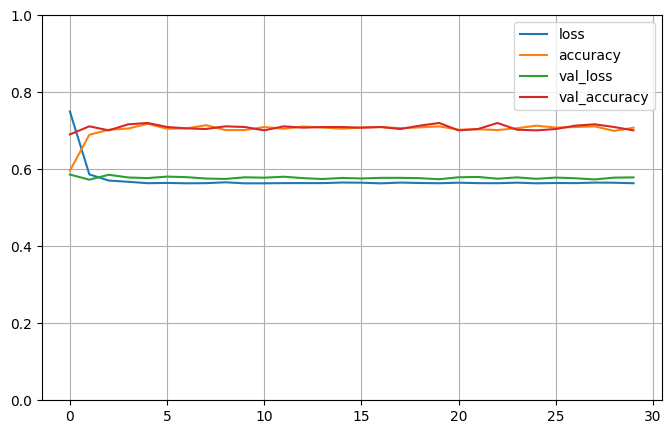

In [51]:
def nn1():
    model = Sequential()

    model.add(Dense(100, input_dim=preprocess_pipeline.transform(X_train).shape[1], activation='linear'))
    model.add(Dense(50, activation='linear'))
    model.add(Dense(10, activation='linear'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

model = keras.wrappers.scikit_learn.KerasClassifier(nn1, epochs=30, batch_size=200, validation_split=0.2)
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', model)])
history = History()

trained_model = pipe.fit(X_train, y_train, classifier__callbacks=[history])
print_model_stats(trained_model)
show_history(history)
models.append(trained_model)

Epoch 1/100


C:\Users\wojte\AppData\Local\Temp\ipykernel_28492\3326150453.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = keras.wrappers.scikit_learn.KerasClassifier(nn2, epochs=100, batch_size=200,  validation_split=0.2)


12/12 [==============================] - 2s 25ms/step - loss: 1.5627 - accuracy: 0.5438 - val_loss: 0.7075 - val_accuracy: 0.6573
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 1.1852 - accuracy: 0.5994 - val_loss: 0.6725 - val_accuracy: 0.6888
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 1.0553 - accuracy: 0.6222 - val_loss: 0.6301 - val_accuracy: 0.6941
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.9659 - accuracy: 0.6200 - val_loss: 0.6089 - val_accuracy: 0.6941
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.9160 - accuracy: 0.6191 - val_loss: 0.5972 - val_accuracy: 0.6941
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.8976 - accuracy: 0.5902 - val_loss: 0.5915 - val_accuracy: 0.7010
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.8506 - accuracy: 0.6195 - val_loss: 0.5868 - val_accuracy: 0.7028
Epoch 8/100
12/12 [=====

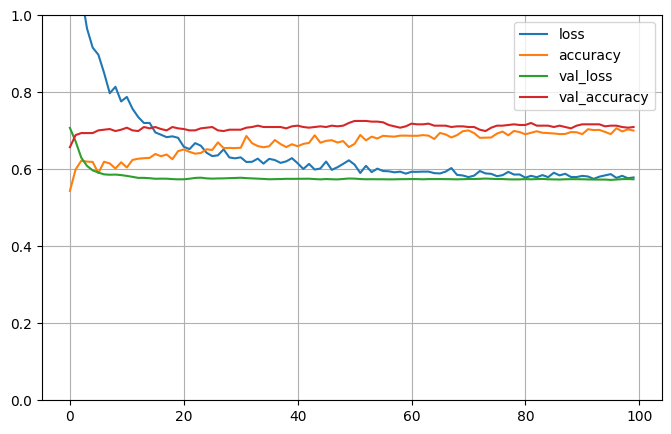

In [52]:
def nn2():
    model = Sequential()

    model.add(Dense(100, input_dim=preprocess_pipeline.transform(X_train).shape[1], activation='linear'))
    model.add(Dropout(0.4))
    model.add(Dense(50, activation='linear'))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='linear'))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))


    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

model = keras.wrappers.scikit_learn.KerasClassifier(nn2, epochs=100, batch_size=200,  validation_split=0.2)
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', model)])
history = History()

trained_model = pipe.fit(X_train, y_train, classifier__callbacks=[history])
print_model_stats(trained_model)
show_history(history)
models.append(trained_model)

C:\Users\wojte\AppData\Local\Temp\ipykernel_28492\1759568862.py:28: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = keras.wrappers.scikit_learn.KerasClassifier(nn3, epochs=1000, batch_size=200,  validation_split=0.2)


Epoch 1/1000
12/12 [==============================] - 2s 28ms/step - loss: 0.7045 - accuracy: 0.5898 - val_loss: 0.6479 - val_accuracy: 0.5962
Epoch 2/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.6507 - accuracy: 0.6467 - val_loss: 0.6090 - val_accuracy: 0.6993
Epoch 3/1000
12/12 [==============================] - 0s 8ms/step - loss: 0.6420 - accuracy: 0.6432 - val_loss: 0.5973 - val_accuracy: 0.7080
Epoch 4/1000
12/12 [==============================] - 0s 8ms/step - loss: 0.6239 - accuracy: 0.6384 - val_loss: 0.5938 - val_accuracy: 0.7045
Epoch 5/1000
12/12 [==============================] - 0s 8ms/step - loss: 0.6124 - accuracy: 0.6655 - val_loss: 0.5914 - val_accuracy: 0.7080
Epoch 6/1000
12/12 [==============================] - 0s 8ms/step - loss: 0.6288 - accuracy: 0.6559 - val_loss: 0.5888 - val_accuracy: 0.7098
Epoch 7/1000
12/12 [==============================] - 0s 8ms/step - loss: 0.6036 - accuracy: 0.6782 - val_loss: 0.5867 - val_accuracy: 0.7133
Epoch

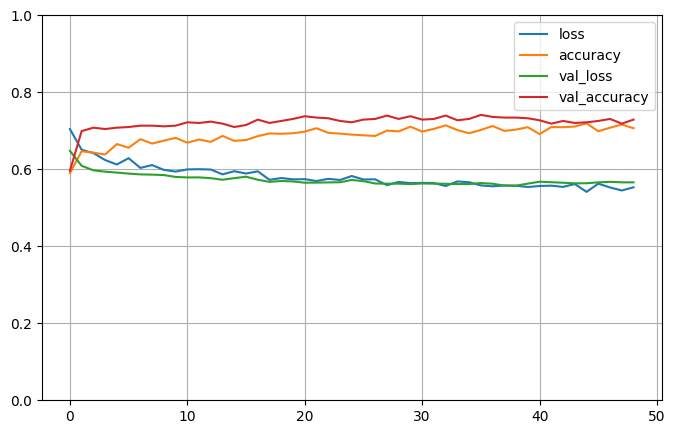

In [53]:
from keras.layers import Flatten, BatchNormalization


def nn3():
    model = Sequential()

    model.add(Flatten(input_shape=[50]))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.3))

    model.add(Dense(300))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.3))

    model.add(Dense(100))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.3))

    model.add(Dense(1,activation="sigmoid"))


    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

model = keras.wrappers.scikit_learn.KerasClassifier(nn3, epochs=1000, batch_size=200,  validation_split=0.2)
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', model)])
history = History()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
trained_model = pipe.fit(X_train, y_train, classifier__callbacks=[history,early_stopping])
print_model_stats(trained_model)
show_history(history)
models.append(trained_model)



garbage

In [ ]:

# class TwoLayerFeedForward:
#     def __call__():
#         clf = Sequential()
#         clf.add(Dense(9, activation='relu', input_dim=X_train.shape[1]))
#         clf.add(Dense(9, activation='relu'))
#         clf.add(Dense(3, activation='softmax'))
#         clf.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
#         return clf
from keras.wrappers.scikit_learn import KerasClassifier
def twoLayerFeedForward():
    # keras.backend.clear_session()
    clf = Sequential()
    clf.add(Dense(12, activation='relu', input_dim=preprocess_pipeline.transform(X_train).shape[1]))
    clf.add(Dense(9, activation='relu'))
    clf.add(Dense(1, activation='sigmoid'))
    clf.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return clf
def duuuu():

    return model
model = KerasClassifier(duuuu, epochs=30, batch_size=500, verbose=0)

In [ ]:
X_train_trans=preprocess_pipeline.transform(X_train)
X_test_trans=preprocess_pipeline.transform(X_test)


model = Sequential()

# create first hidden layer
model.add(Dense(100, input_dim=X_train_trans.shape[1], activation='linear'))
model.add(Dense(50, activation='linear'))
model.add(Dense(10, activation='linear'))
# model.add(Dropout(dr))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[51]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(1, activation="softmax")
# ])

# model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(X_train_trans, y_train, epochs=100, batch_size=32, validation_data=(X_test_trans, y_test))
val_acc = np.mean(history.history['val_acc'])
# print("\n%s: %.2f%%" % ('val_acc', val_acc*100))
# # history = model.fit(X_train_trans, y_train, epochs=30,
# #                     validation_data=(X_test_trans, y_test))

In [ ]:
dupa

In [ ]:
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = Sequential()

# create first hidden layer
model.add(Dense(100, input_dim=X_train.shape[1], activation="sigmoid"))

# create additional hidden layers
# for i in range(1,len(lyrs)):
#         model.add(Dense(lyrs[i], activation=act))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
# add dropout, default is none

# model.add(Dropout(dr))

# create output layer
model.add(Dense(1, activation='sigmoid'))  # output layer

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

print(model.summary())
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', model)])
training = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['val_acc'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))

Playground

In [ ]:


#
# Generate dummy data.
#

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np
import pandas as pd

X_train = np.random.random((1000, 3))
y_train = pd.get_dummies(np.argmax(X_train[:, :3], axis=1)).values
X_test = np.random.random((100, 3))
y_test = pd.get_dummies(np.argmax(X_test[:, :3], axis=1)).values



In [ ]:
#
# Build a KerasClassifier wrapper object.
# I had trouble getting the callable class approach to work. The method approach seems to be pretty universial anyway.
#



# Doesn't work?
# class TwoLayerFeedForward:
#     def __call__():
#         clf = Sequential()
#         clf.add(Dense(9, activation='relu', input_dim=3))
#         clf.add(Dense(9, activation='relu'))
#         clf.add(Dense(3, activation='softmax'))
#         clf.compile(loss='categorical_crossentropy', optimizer=SGD())
#         return clf

def twoLayerFeedForward():
    clf = Sequential()
    clf.add(Dense(9, activation='relu', input_dim=3))
    clf.add(Dense(9, activation='relu'))
    clf.add(Dense(3, activation='softmax'))
    clf.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=["accuracy"])
    return clf


# clf = KerasClassifier(TwoLayerFeedForward(), epochs=100, batch_size=500, verbose=0)
clf = KerasClassifier(twoLayerFeedForward, epochs=100, batch_size=500, verbose=0)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

trans = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

import pandas as pd

# Keras classifiers work with one hot encoded categorical columns (e.g. [[1 0 0], [0 1 0], ...]).
# StratifiedKFold works with categorical encoded columns (e.g. [1 2 3 1 ...]).
# This requires juggling the representation at shuffle time versus at runtime.
scores = []
for train_idx, test_idx in trans.split(X_train, y_train.argmax(axis=1)):
    X_cv, y_cv = X_train[train_idx], pd.get_dummies(y_train.argmax(axis=1)[train_idx]).values
    clf.fit(X_cv, y_cv)
    scores.append(clf.score(X_cv, y_cv))

In [ ]:


scores

